Import libraries

In [129]:
import pandas as pd 
import seaborn as sns

Import dataset

In [130]:
data = pd.read_csv("dataset.csv")

# Translate the dataset columns
data.columns = ["sex", "weight (kg)", "height (cm)"]

data

,sex,weight (kg),height (cm)
0,femenino,60.0,160.0
1,masculino,69.0,170.0
2,masculino,73.0,167.0
3,NaN,81.0,170.0
4,masculino,80.0,170.0
...,...,...,...
595,femenino,65.0,164.0
596,femenino,63.0,160.0
597,masculino,70.0,163.0
598,masculino,75.0,169.0


<Axes: xlabel='weight (kg)', ylabel='Count'>

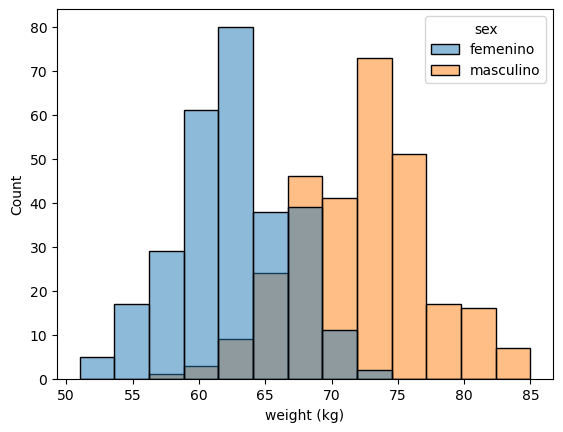

In [131]:
sns.histplot(data = data, x = "weight (kg)", hue = "sex")

<Axes: xlabel='height (cm)', ylabel='Count'>

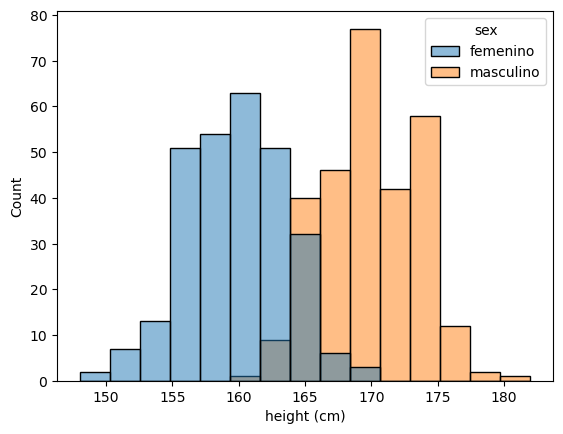

In [132]:
sns.histplot(data = data, x = "height (cm)", hue = "sex")

## You can check for missing data in different ways

1- The info method that shows a summary of the dataframe

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          570 non-null    object 
 1   weight (kg)  600 non-null    float64
 2   height (cm)  600 non-null    float64
dtypes: float64(2), object(1)
memory usage: 14.2+ KB


2- The isna method that it is used to detect missing values ​​for an array-like object.

In [134]:
data.isna().sum()

sex            30
weight (kg)     0
height (cm)     0
dtype: int64

3- The value_counts method that returns an object containing, in descending order by default, the different values ​​included in the series along with the number of occurrences of each one.

In [135]:
data["sex"].value_counts()

masculino    288
femenino     282
Name: sex, dtype: int64

## Ways to handle missing data for categorical variables

1. Delete rows with missing records
2. Delete the "problematic" column
3. Impute with the most frequent category
4. Impute using *Machine Learning* (**recommended**)

### 1- Delete rows with missing records

It simply consists of removing the entire row for each missing record.

- Advantage: it is the simplest method!
- Disadvantages:
  - If the dataset is "small" deletion can significantly reduce its size
  - The above can make subsequent tasks difficult, such as using *Machine Learning* models to generate predictions



In [136]:
delete_row = data.dropna(axis= 0)
delete_row.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          570 non-null    object 
 1   weight (kg)  570 non-null    float64
 2   height (cm)  570 non-null    float64
dtypes: float64(2), object(1)
memory usage: 17.8+ KB


### 2- Delete columns with missing records

It simply consists of removing the "problematic" column:

- Advantage: it is the simplest method!
- Disadvantages:
  - Removing the "problem" column may make subsequent tasks difficult
  - Is it worth deleting an entire column when only a few pieces of data are missing?

In [137]:
delete_col = data.dropna(axis = 1)
delete_col

,weight (kg),height (cm)
0,60.0,160.0
1,69.0,170.0
2,73.0,167.0
3,81.0,170.0
4,80.0,170.0
...,...,...
595,65.0,164.0
596,63.0,160.0
597,70.0,163.0
598,75.0,169.0


### 3- Impute with the most frequent category

It consists of finding, in the "problem" column, the category (or level) that occurs most frequently and using it to fill in the missing data.

- Advantage: neither rows nor columns are deleted.
- Disadvantage: this imputation can generate biases


In [138]:
# see the value that is repeated the most
data["sex"].value_counts()

masculino    288
femenino     282
Name: sex, dtype: int64

In [139]:
# Generate a copy of the original DataFrame
data_copy = data.copy()

# Replace the missing data with the value that is repeated the most
data_copy["sex"] = data_copy["sex"].fillna("male")

# Check for missing values
data_copy["sex"].isna().sum()

0

### 4- Impute using *Machine Learning*

**Advantages**
- The amount of data is preserved
- No biases are generated (as long as the model can be built correctly)

**Disadvantages**
- Sufficient data is required to train the model: there should not be too much missing data or too little training data
- Depending on the data set, it is not always easy to build a model that generates adequate predictions

**Step by step procedure**
1. Create the training set: records containing complete data
2. Create the test set: records containing incomplete data
3. Choose and train the *Machine Learning* model with the training set
4. Predict missing data with the trained model and the test set
5. Incorporate the predicted data into the dataset


### 1- Create the training set 

In [140]:
# Extract the rows that are complete
training_set = data.dropna().to_numpy()
training_set.shape

(570, 3)

#### Separate the training set

In [141]:
# x_train: columns 1 and 2 ("weight (kg)" and "height (cm)")
# y_train: column 0 ("sex")

x_train = training_set[:, 1:3]
y_train = training_set[:, 0]
x_train, y_train

(array([[60.0, 160.0],
        [69.0, 170.0],
        [73.0, 167.0],
        ...,
        [70.0, 163.0],
        [75.0, 169.0],
        [66.0, 157.0]], dtype=object),
 array(['femenino', 'masculino', 'masculino', 'masculino', 'femenino',
        'femenino', 'femenino', 'femenino', 'femenino', 'femenino',
        'femenino', 'masculino', 'masculino', 'femenino', 'femenino',
        'femenino', 'masculino', 'femenino', 'femenino', 'masculino',
        'femenino', 'femenino', 'masculino', 'masculino', 'femenino',
        'masculino', 'femenino', 'femenino', 'masculino', 'masculino',
        'masculino', 'femenino', 'femenino', 'masculino', 'masculino',
        'masculino', 'masculino', 'masculino', 'masculino', 'masculino',
        'femenino', 'masculino', 'femenino', 'femenino', 'masculino',
        'masculino', 'masculino', 'femenino', 'femenino', 'masculino',
        'femenino', 'masculino', 'femenino', 'femenino', 'femenino',
        'masculino', 'masculino', 'masculino', 'masculino',

### 2- Create the test set

Rows with incomplete data and columns "weight (kg)" and "height (cm)"

In [142]:
# Incomplete rows
rows = data[~data["sex"].notna()].index

# Only take this rows
x_test = data[["weight (kg)", "height (cm)"]].iloc[rows].to_numpy()
x_test

array([[ 81., 170.],
       [ 68., 166.],
       [ 62., 164.],
       [ 63., 153.],
       [ 57., 155.],
       [ 63., 163.],
       [ 73., 176.],
       [ 64., 167.],
       [ 71., 168.],
       [ 80., 163.],
       [ 69., 157.],
       [ 58., 167.],
       [ 72., 173.],
       [ 62., 159.],
       [ 66., 155.],
       [ 66., 162.],
       [ 58., 161.],
       [ 87., 171.],
       [ 68., 169.],
       [ 67., 161.],
       [ 58., 160.],
       [ 62., 155.],
       [ 63., 153.],
       [ 70., 166.],
       [ 60., 162.],
       [ 65., 159.],
       [ 71., 169.],
       [ 70., 172.],
       [ 63., 165.],
       [ 63., 164.]])

### 3- Model

Before selecting the model we must transform the strings into numerical data so that the model can process them

In [143]:
from sklearn.preprocessing import LabelEncoder

# Create the model
label_encoder = LabelEncoder()

# Train the model
label_encoder.fit(y_train)

label_encoder.classes_

array(['femenino', 'masculino'], dtype=object)

In [144]:
# Transform it
y_train = label_encoder.transform(y_train)
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

**Logistic regression** is a type of statistical model used to predict the probability of a binary event occurring. 

In logistic regression, a logistic function is used to model the relationship between one or more independent variables (predictors) and the dependent variable (target), which generally represents the probability of an event occurring. The model takes into account the characteristics of the independent variables to estimate the probability that the dependent variable belongs to one of the two categories.

The logistic function transforms the linear combination of the independent variables into a probability that is always in the range 0 to 1. This transformation is useful for modeling binary classification problems and for interpreting the results in terms of probabilities.



In [145]:
from sklearn.linear_model import LogisticRegression

# Create the model
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(x_train, y_train)

logistic_regression.classes_

array([0, 1])

### 4- Predict missing data with the trained model and the test set

In [146]:
# Generate the prediction
prediction = logistic_regression.predict(x_test)

# Do the inverse transformation. Convert numerical data into strings
categories = label_encoder.inverse_transform(prediction)
categories

array(['masculino', 'masculino', 'femenino', 'femenino', 'femenino',
       'femenino', 'masculino', 'masculino', 'masculino', 'masculino',
       'femenino', 'femenino', 'masculino', 'femenino', 'femenino',
       'femenino', 'femenino', 'masculino', 'masculino', 'femenino',
       'femenino', 'femenino', 'femenino', 'masculino', 'femenino',
       'femenino', 'masculino', 'masculino', 'femenino', 'femenino'],
      dtype=object)

### 5- Incorporate the predicted data into the dataset


In [147]:
data_ml = data.copy()
data_ml.iloc[rows, 0] = categories
data_ml

,sex,weight (kg),height (cm)
0,femenino,60.0,160.0
1,masculino,69.0,170.0
2,masculino,73.0,167.0
3,masculino,81.0,170.0
4,masculino,80.0,170.0
...,...,...,...
595,femenino,65.0,164.0
596,femenino,63.0,160.0
597,masculino,70.0,163.0
598,masculino,75.0,169.0


In [148]:
data_ml["sex"].isna().sum()

0